# 3 Aprendizaje no supervisado

**Aprendizaje no supervisado:** $\;$ trata de "explicar" los datos cuando solo tenemos un conjunto de "entradas", $\mathcal{D}=\{\boldsymbol{x}_n\}_{n=1}^N$, sin sus correspondientes "salidas" $\{\boldsymbol{y}_n\}$

**Aproximación probabilística:** $\;$ ajusta un modelo incondicional $p(\boldsymbol{x})$, en lugar de uno condicional $p(\boldsymbol{y}\mid\boldsymbol{x})$ como en supervisado

**Mayor aplicabilidad:** $\;$ del aprendizaje no supervisado que el supervisado
* Se debe a que los datos no supervisados son fáciles de conseguir; no así la supervisión
* Además, el aprendizaje no supervisado puede aplicarse a tareas mal definidas, pues en principio no requiere disponer de un conjunto de categorías dado, ni siquiera asumir que los datos se agrupan en un cierto número de categorías dado

## 3.1 Clustering

**Clustering:** $\:$ área clásica del análisis exploratorio de datos cuyo objetivo es encontrar **agrupamientos naturales** de los datos en grupos homogéneos o **clústers**

**Ejemplo:** $\;$ clustering de iris según longitud y amplitud de pétalos

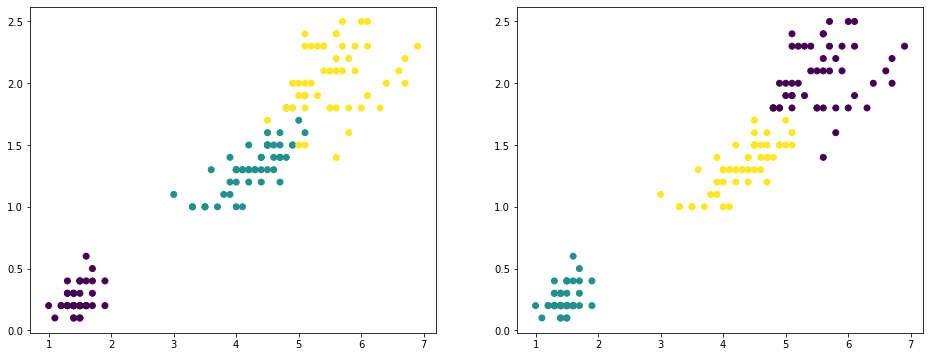

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
iris = load_iris(); X = iris.data[:, [2, 3]]; y = iris.target
K = 3 # <<< escoge número de clústers
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(*X.T, c=y); axes[1].scatter(*X.T, c=y_pred);

## 3.2 Descubriendo "factores de variación" latentes

**Reducción de la dimensión:** $\;$ cuando trabajamos con datos de alta dimensión, por lo general resulta útil reducirla mediante una proyección en un espacio de dimensión reducida que capture la "esencia" de los datos

**Factores latentes:** $\;$ asumimos que cada observación $\boldsymbol{x}_n\in\mathbb{R}^D$ se genera a partir de $K\ll D$, factores latentes ocultos, $\boldsymbol{z}_n\in\mathbb{R}^K$
* Como los $\boldsymbol{z}_n$ no se conocen, adoptamos un modelo probabilístico sencillo para $p(\boldsymbol{z}_n)$ como, por ejemplo, una Gaussiana

**Análisis factorial:** $\;$ modelo lineal similar a regresión lineal, salvo que solo observamos las salidas $\boldsymbol{x}_n$; no las entradas $\boldsymbol{z}_n$:
$$p(\boldsymbol{x}_n\mid\boldsymbol{z}_n;\boldsymbol{\theta})%
=\mathcal{N}(\boldsymbol{x}_n\mid \mathbf{W}\boldsymbol{z}_n+\boldsymbol{\mu},\mathbf{\Sigma})$$

**Análisis de componentes principales probabilístico (PPCA):** $\;$ análisis factorial particularizado a $\mathbf{\Sigma}$ proporcional a la identidad
$$\mathbf{\Sigma}=\sigma^2\mathbf{I}%
\qquad\text{cumpliéndose que}\qquad%
\lim_{\sigma^2\to 0}\operatorname{PPCA}(\sigma^2)=\operatorname{PCA}$$

**Modelos no lineales:** $\;$ el mapping de $\boldsymbol{z}_n$ a $\boldsymbol{x}_n$ puede generalizarse con un modelo no lineal $f(\boldsymbol{z};\boldsymbol{\theta})$ como, por ejemplo, una DNN
$$p(\boldsymbol{x}_n\mid\boldsymbol{z}_n;\boldsymbol{\theta})%
=\mathcal{N}(\boldsymbol{x}_n\mid f(\boldsymbol{z};\boldsymbol{\theta}),\sigma^2\mathbf{I})$$
* El aprendizaje de $\boldsymbol{\theta}$ no es sencillo ya que las entradas de la DNN deben inferirse
* **Autoencoder variacional (VAE, variational autoencoder):** $\;$ método aproximado muy popular

## 3.3 Evaluación del aprendizaje no supervisado

**Como problema de estimación de densidad:** $\;$ la bondad de $p(\boldsymbol{x}\mid\boldsymbol{\theta})$ se mide como la probabilidad asignada a un conjunto de test $\mathcal{D}$
* Formalmente, podemos calcular la neg-log-verosimilitud (incondicional) del test:
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D})%
=-\frac{1}{\mathcal{D}}\sum_{\boldsymbol{x}\in\mathcal{D}}\log p(\boldsymbol{x}\mid \boldsymbol{\theta})$$
* Un buen modelo no se "sorprenderá" con datos reales no vistos; esto es, les asignará alta probabilidad y, por tanto, baja $\mathcal{L}$

**En una tarea de aprendizaje supervisado marco (downstream):** $\;$ la representación no supervisada aprendida puede usarse como entrada para un método de aprendizaje supervisado marco y, si es útil, el método supervisado aprenderá con menos datos supervisados de los que requeriría sin ella, esto es, con mayor **eficiencia muestral**
* *Ejemplo:* $\;$ iris con $4$ características (en lugar de fotos)
* *Otro ejemplo:* $\;$ reconocimiento del habla con modelos de lenguaje externos

**Interpretabilidad:** $\;$ aparte de las aproximaciones anteriores y en línea con el objetivo clásico del clustering, el aprendizaje no supervisado suele verse como una herramienta de análisis exploratorio de datos basada en modelos fácilmente interpretables
* La interpretación de resultados ayuda a comprender mejor la estructura subyacente a los datos